# Depth prediction

We use the FCRN Depth prediction model to get an estimate of depth in the rooms.

You can download the tensorflow ckpt model from the following URL:
https://github.com/iro-cp/FCRN-DepthPrediction

In [23]:
import tensorflow as tf
import depthpred as model
from PIL import Image
import numpy as np
import time
import matplotlib.pyplot as plt

In [19]:
height = 228
width = 304
channels = 3
batch_size = 1

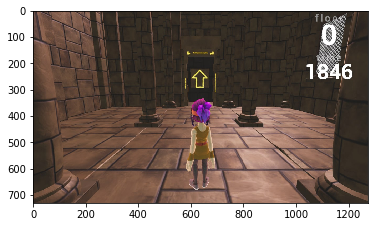

In [27]:
img = Image.open('images/image.jpg')
plt.imshow(img)
img = img.resize([width,height], Image.ANTIALIAS)
img = np.array(img).astype('float32')
img = np.expand_dims(np.asarray(img), axis = 0)

INFO:tensorflow:Restoring parameters from depthpred/NYU_FCRN.ckpt
0.8794949054718018


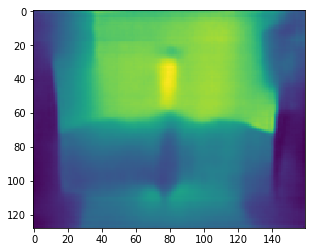

In [29]:
tf.reset_default_graph()
input_node = tf.placeholder(tf.float32, shape=(None, height, width, channels))
net = model.ResNet50UpProj({'data': input_node}, batch_size, 1, False)
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, 'model/NYU_FCRN.ckpt')
    t1 = time.time()
    pred = sess.run(net.get_output(), feed_dict={input_node: img})
    t2 = time.time()
    print(t2-t1)
plt.imshow(pred[0,:,:,0])

# Object detection